In [1]:
# Загрузка зависимостей
import numpy
import pandas
import matplotlib.pyplot
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

In [2]:
# Загрузка и анализ набора данных
row_dataset = pandas.read_csv('machine.data.csv', header=None) # Убедиться в правильности пути к файлу!
row_dataset.head(10) # Вывод первых 10 строк

,0,1,2,3,4,5,6,7,8,9
0,adviser,32/60,125,256,6000,256,16,128,198,199
1,amdahl,470v/7,29,8000,32000,32,8,32,269,253
2,amdahl,470v/7a,29,8000,32000,32,8,32,220,253
3,amdahl,470v/7b,29,8000,32000,32,8,32,172,253
4,amdahl,470v/7c,29,8000,16000,32,8,16,132,132
5,amdahl,470v/b,26,8000,32000,64,8,32,318,290
6,amdahl,580-5840,23,16000,32000,64,16,32,367,381
7,amdahl,580-5850,23,16000,32000,64,16,32,489,381
8,amdahl,580-5860,23,16000,64000,64,16,32,636,749
9,amdahl,580-5880,23,32000,64000,128,32,64,1144,1238


In [3]:
# Размер набора данных
print(row_dataset.shape)

(209, 10)


In [4]:
# Создаем набор данных, в котором будут храниться обработанные данные
dataset = pandas.DataFrame()

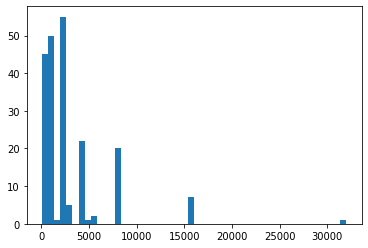

In [5]:
# Обработка данных в столбце №3 (MMIN: minimum main memory in kilobytes (integer))

# Загружаем данные
data = row_dataset[3]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

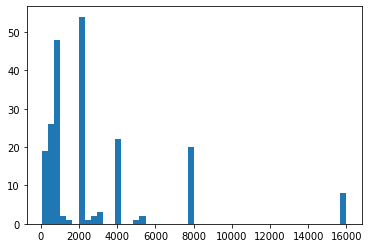

In [6]:
# Наблюдаем проблему №4 - выброс в районе 32000. Применяем отсечение с разрешенным интервалом от 0 до 16000.
data = numpy.clip(data, 0, 16000)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

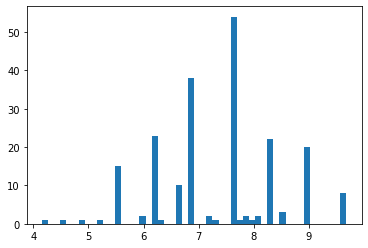

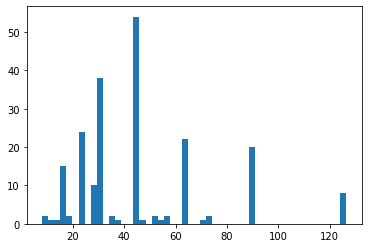

In [7]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Попробуем применить к данным логарифм и извлечение квадратного корня.
matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [8]:
# Логарифм даёт более равномерно распределенные данные, используем его
data = numpy.log(data)

In [9]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

4.1588830833596715
9.680344001221918


In [10]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

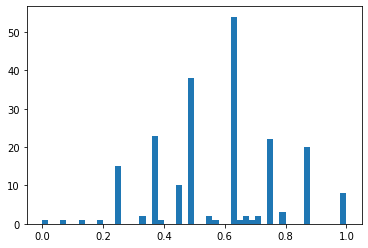

In [11]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

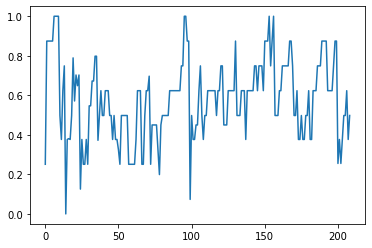

In [12]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [71]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [72]:
# Конвертируем в одномерный массив
data = data.flatten()

In [73]:
# Сохраняем в итоговом наборе данных
dataset['MMIN'] = data

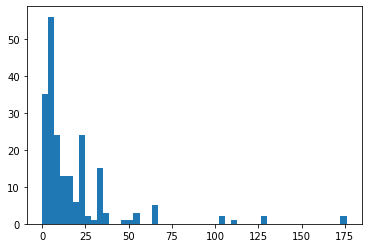

In [74]:
# Обработка данных в столбце №7 (CHMAX: maximum channels in units (integer))

# Загружаем данные
data = row_dataset[7]

# Анализируем распределение, используя гистограмму. Параметр bins отвечает за число столбцов в гистрограмме.
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

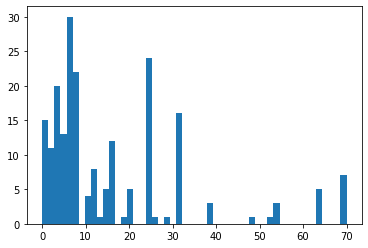

In [75]:
# Наблюдаем проблему №4 - выбросы значений в интервале (100, 175). Применяем отсечение с разрешенным интервалом от 0 до 70.
data = numpy.clip(data, 0, 70)

# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

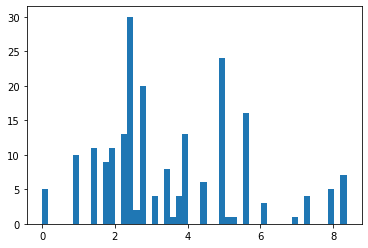

In [76]:
# Наблюдаем проблему №3 - очень неравномерное распределение. Применять логарифм нельзя, т.к. среди значений есть нули.
# Применим извлечение квадратного корня.

matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()

In [77]:
data = data ** 0.5

In [78]:
# Теперь данные имеют следующую область значений
print(numpy.min(data))
print(numpy.max(data))

0.0
8.366600265340756


In [79]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
scaler = MinMaxScaler()
data = numpy.array(data).reshape(-1,1)
data = scaler.fit_transform(data)

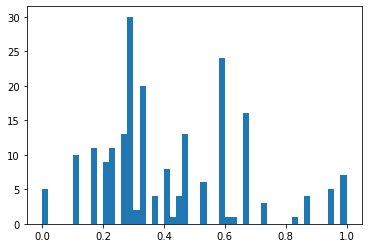

In [80]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

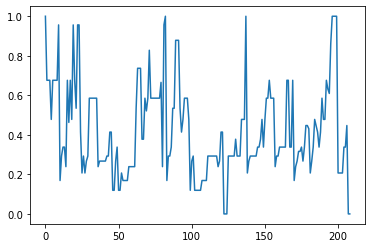

In [81]:
# Можем взглянуть на сами данные
matplotlib.pyplot.plot(data)
matplotlib.pyplot.show()

In [82]:
# Проверяем и убеждаемся, что в процессе трансформации данные получили "лишнее" измерение
print(data.ndim)

2


In [83]:
# Конвертируем в одномерный массив
data = data.flatten()

In [84]:
# Сохраняем в итоговом наборе данных
dataset['CHMAX'] = data
dataset.head(10)

,MMIN,CHMAX
0,0.251074,1.000000
1,0.874463,0.676123
2,0.874463,0.676123
3,0.874463,0.676123
4,0.874463,0.478091
5,0.874463,0.676123
6,1.000000,0.676123
7,1.000000,0.676123
8,1.000000,0.676123
9,1.000000,0.956183


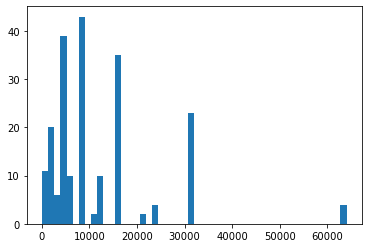

In [85]:
# Обработка данных в столбце №4

# Загружаем данные
data = row_dataset[4]

# Анализируем распределение
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()


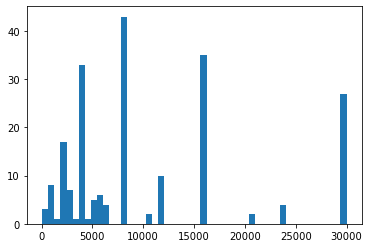

In [86]:
data = numpy.clip(data,0,30000)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

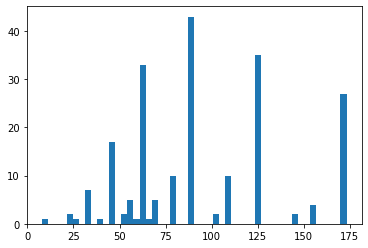

In [87]:
matplotlib.pyplot.hist(data ** 0.5, bins = 50)
matplotlib.pyplot.show()
data = data ** 0.5

In [88]:
# Приводим значения к интервалу (0, 1), считая, что они ближе к равномерному распределению
data = numpy.array(data).reshape(-1,1)
data = MinMaxScaler().fit_transform(data)

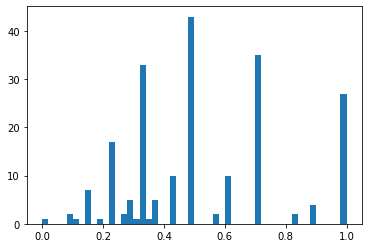

,MMIN,CHMAX,MMAX
0,0.251074,1.000000,0.420445
1,0.874463,0.676123,1.000000
2,0.874463,0.676123,1.000000
3,0.874463,0.676123,1.000000
4,0.874463,0.478091,0.717236
5,0.874463,0.676123,1.000000
6,1.000000,0.676123,1.000000
7,1.000000,0.676123,1.000000
8,1.000000,0.676123,1.000000
9,1.000000,0.956183,1.000000


In [89]:
# Результат
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()
data = data.flatten()
dataset['MMAX'] = data
dataset.head(10)

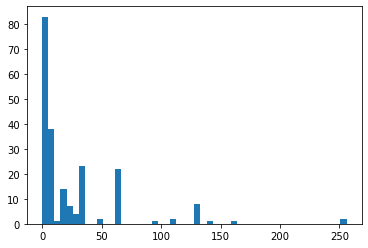

In [90]:
#Обработка столбца №5

data = row_dataset[5]
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

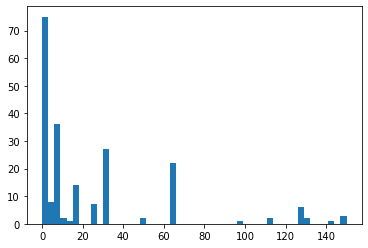

In [91]:
data = numpy.clip(data, 0, 150)
matplotlib.pyplot.hist(data, bins=50)
matplotlib.pyplot.show()

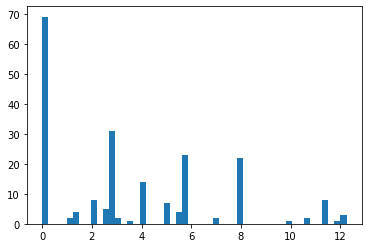

In [92]:

matplotlib.pyplot.hist(data**0.5, bins=50)
matplotlib.pyplot.show()
data = data**0.5

In [93]:
data = numpy.array(data).reshape(-1,1)
data = MinMaxScaler().fit_transform(data)
data = data.flatten()
dataset['CACH'] = data
dataset.head(10)

,MMIN,CHMAX,MMAX,CACH
0,0.251074,1.000000,0.420445,1.000000
1,0.874463,0.676123,1.000000,0.461880
2,0.874463,0.676123,1.000000,0.461880
3,0.874463,0.676123,1.000000,0.461880
4,0.874463,0.478091,0.717236,0.461880
5,0.874463,0.676123,1.000000,0.653197
6,1.000000,0.676123,1.000000,0.653197
7,1.000000,0.676123,1.000000,0.653197
8,1.000000,0.676123,1.000000,0.653197
9,1.000000,0.956183,1.000000,0.923760


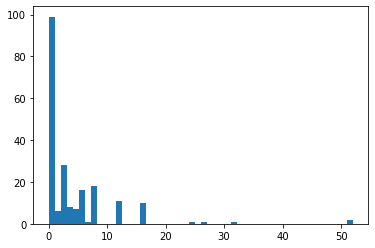

In [94]:
#Анализ столбца №6
data = row_dataset[6]

# Анализируем распределение
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

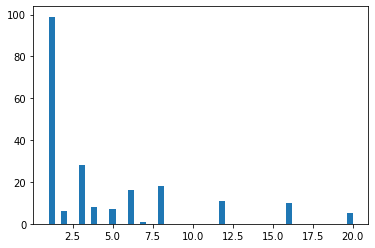

In [95]:
data = numpy.clip(data, 1, 20)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

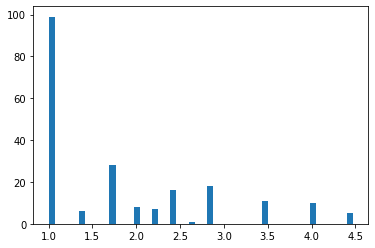

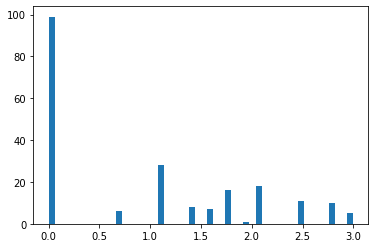

In [96]:
matplotlib.pyplot.hist(data**0.5, bins = 50)
matplotlib.pyplot.show()

matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()
data = numpy.log(data)

In [97]:
data = numpy.array(data).reshape(-1,1)
data = MinMaxScaler().fit_transform(data)
data = data.flatten()
dataset['CHMIN'] = data
dataset.head(10)

,MMIN,CHMAX,MMAX,CACH,CHMIN
0,0.251074,1.000000,0.420445,1.000000,0.925513
1,0.874463,0.676123,1.000000,0.461880,0.694135
2,0.874463,0.676123,1.000000,0.461880,0.694135
3,0.874463,0.676123,1.000000,0.461880,0.694135
4,0.874463,0.478091,0.717236,0.461880,0.694135
5,0.874463,0.676123,1.000000,0.653197,0.694135
6,1.000000,0.676123,1.000000,0.653197,0.925513
7,1.000000,0.676123,1.000000,0.653197,0.925513
8,1.000000,0.676123,1.000000,0.653197,0.925513
9,1.000000,0.956183,1.000000,0.923760,1.000000


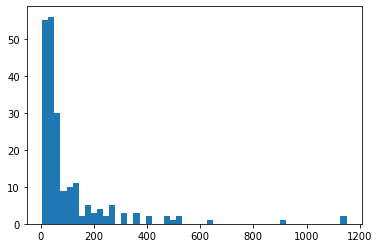

In [98]:
#Анализ столбца №8
data = row_dataset[8]

matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

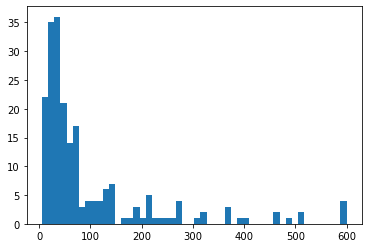

In [99]:
data = numpy.clip(data, 0, 600)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

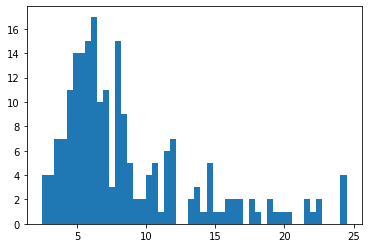

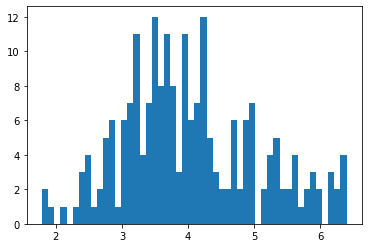

In [100]:
matplotlib.pyplot.hist(data**0.5, bins = 50)
matplotlib.pyplot.show()


matplotlib.pyplot.hist(numpy.log(data), bins = 50)
matplotlib.pyplot.show()

data = numpy.log(data)

In [101]:
data = numpy.array(data).reshape(-1,1)
data = StandardScaler().fit_transform(data)
data =  data.flatten()
dataset["PRP"] = data
dataset.head(10)

,MMIN,CHMAX,MMAX,CACH,CHMIN,PRP
0,0.251074,1.000000,0.420445,1.000000,0.925513,1.229905
1,0.874463,0.676123,1.000000,0.461880,0.694135,1.529143
2,0.874463,0.676123,1.000000,0.461880,0.694135,1.332788
3,0.874463,0.676123,1.000000,0.461880,0.694135,1.092443
4,0.874463,0.478091,0.717236,0.461880,0.694135,0.833975
5,0.874463,0.676123,1.000000,0.653197,0.694135,1.692548
6,1.000000,0.676123,1.000000,0.653197,0.925513,1.832489
7,1.000000,0.676123,1.000000,0.653197,0.925513,2.112740
8,1.000000,0.676123,1.000000,0.653197,0.925513,2.312497
9,1.000000,0.956183,1.000000,0.923760,1.000000,2.312497


(0, 'adviser') (1, 'amdahl') (2, 'apollo') (3, 'basf') (4, 'bti') (5, 'burroughs') (6, 'c.r.d') (7, 'cambex') (8, 'cdc') (9, 'dec') (10, 'dg') (11, 'formation') (12, 'four-phase') (13, 'gould') (14, 'harris') (15, 'honeywell') (16, 'hp') (17, 'ibm') (18, 'ipl') (19, 'magnuson') (20, 'microdata') (21, 'nas') (22, 'ncr') (23, 'nixdorf') (24, 'perkin-elmer') (25, 'prime') (26, 'siemens') (27, 'sperry') (28, 'sratus') (29, 'wang')


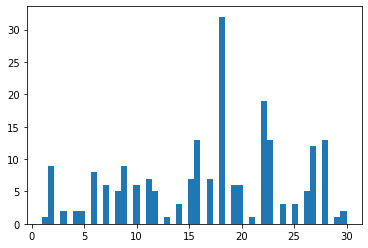

In [102]:
#Столбец №0
data = row_dataset[0]
#data = pandas.factorize(data)# слова стали цифрами
data = pandas.get_dummies(data)
print(*enumerate(data))
data = numpy.array([data[i[1]] * (i[0]+1) for i in  enumerate(data)]).flatten()
data = data[data != 0]
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

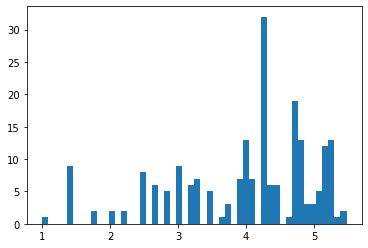

In [103]:
matplotlib.pyplot.hist(data**0.5, bins = 50)
matplotlib.pyplot.show()

data = data**0.5

In [104]:
#Столбец №2
data = numpy.array(data).reshape(-1,1)
data = MinMaxScaler().fit_transform(data)
data = data.flatten()
dataset['Vendor_name'] = data
dataset.head(10)

,MMIN,CHMAX,MMAX,CACH,CHMIN,PRP,Vendor_name
0,0.251074,1.000000,0.420445,1.000000,0.925513,1.229905,0.000000
1,0.874463,0.676123,1.000000,0.461880,0.694135,1.529143,0.092516
2,0.874463,0.676123,1.000000,0.461880,0.694135,1.332788,0.092516
3,0.874463,0.676123,1.000000,0.461880,0.694135,1.092443,0.092516
4,0.874463,0.478091,0.717236,0.461880,0.694135,0.833975,0.092516
5,0.874463,0.676123,1.000000,0.653197,0.694135,1.692548,0.092516
6,1.000000,0.676123,1.000000,0.653197,0.925513,1.832489,0.092516
7,1.000000,0.676123,1.000000,0.653197,0.925513,2.112740,0.092516
8,1.000000,0.676123,1.000000,0.653197,0.925513,2.312497,0.092516
9,1.000000,0.956183,1.000000,0.923760,1.000000,2.312497,0.092516


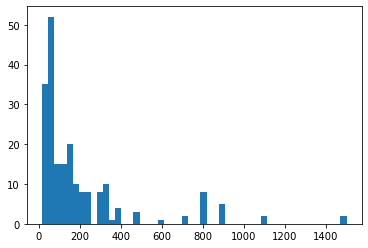

In [105]:
data = row_dataset[2]

matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

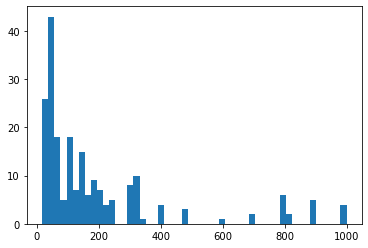

In [106]:
data = numpy.clip(data, 0, 1000)
matplotlib.pyplot.hist(data, bins = 50)
matplotlib.pyplot.show()

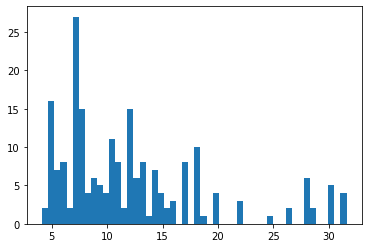

In [107]:
matplotlib.pyplot.hist(data**0.5, bins = 50)
matplotlib.pyplot.show()

data = data**0.5

In [108]:
data = numpy.array(data).reshape(-1,1)
data = MinMaxScaler().fit_transform(data)
data = data.flatten()
dataset['MYCT'] = data
dataset.head(10)

,MMIN,CHMAX,MMAX,CACH,CHMIN,PRP,Vendor_name,MYCT
0,0.251074,1.000000,0.420445,1.000000,0.925513,1.229905,0.000000,0.256630
1,0.874463,0.676123,1.000000,0.461880,0.694135,1.529143,0.092516,0.045894
2,0.874463,0.676123,1.000000,0.461880,0.694135,1.332788,0.092516,0.045894
3,0.874463,0.676123,1.000000,0.461880,0.694135,1.092443,0.092516,0.045894
4,0.874463,0.478091,0.717236,0.461880,0.694135,0.833975,0.092516,0.045894
5,0.874463,0.676123,1.000000,0.653197,0.694135,1.692548,0.092516,0.035488
6,1.000000,0.676123,1.000000,0.653197,0.925513,1.832489,0.092516,0.024463
7,1.000000,0.676123,1.000000,0.653197,0.925513,2.112740,0.092516,0.024463
8,1.000000,0.676123,1.000000,0.653197,0.925513,2.312497,0.092516,0.024463
9,1.000000,0.956183,1.000000,0.923760,1.000000,2.312497,0.092516,0.024463


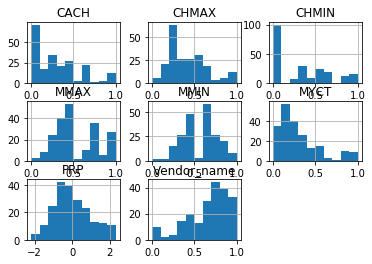

In [109]:
dataset.hist()
matplotlib.pyplot.show()

In [114]:
# Собрали таблицу
final_dataset = pandas.DataFrame(dataset['Vendor_name'])
final_dataset[["MYCT", "MMIN"]] = dataset[["MYCT", "MMIN"]]
name_list = [i for i in dataset.columns]
final_dataset[name_list[2:5]] = dataset[name_list[2:5]]
final_dataset[[name_list[1],name_list[5]]] = dataset[[name_list[1], name_list[5]]]
final_dataset.head()

,Vendor_name,MYCT,MMIN,MMAX,CACH,CHMIN,CHMAX,PRP
0,0.000000,0.256630,0.251074,0.420445,1.00000,0.925513,1.000000,1.229905
1,0.092516,0.045894,0.874463,1.000000,0.46188,0.694135,0.676123,1.529143
2,0.092516,0.045894,0.874463,1.000000,0.46188,0.694135,0.676123,1.332788
3,0.092516,0.045894,0.874463,1.000000,0.46188,0.694135,0.676123,1.092443
4,0.092516,0.045894,0.874463,0.717236,0.46188,0.694135,0.478091,0.833975


In [117]:
#скачали таблицу
final_dataset.to_csv('prepared_data.csv', index=False)